### Model selection and evaluation

In this notebook, we will explore the use of cross-validation to select the best model and evaluate its performance.

We will use the same dataset as in the previous notebook.



### 1 - First, we load the dataset and split it into a training and a test set.


In [2]:
import pandas as pd

df = pd.read_csv('../src/data/processed/dataset.csv')
df.head()

,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,average_word_length,...,weekday_thursday,weekday_tuesday,weekday_wednesday,category_bus,category_entertainment,category_lifestyle,category_other,category_socmed,category_tech,category_world
0,731,11,1089,0.418692,1.0,0.553468,20,20,0,4.694215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,731,12,682,0.459542,1.0,0.634961,10,1,0,4.620235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,731,8,397,0.624679,1.0,0.805668,11,1,0,5.445844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,731,5,356,0.618234,1.0,0.766234,3,12,1,4.471910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,731,6,174,0.691860,1.0,0.902913,0,1,0,4.798851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#declare target column name
target_col = 'views'

X = df.drop(target_col, axis=1)
y = df[target_col]


Como estrategia de validacion, elijo una combinacion de las mas conocidas, separando el dataset en 3 grupo, uno de los cuales sera el de test, y los otros dos seran el de train y el de validacion. El de train se usara para entrenar el modelo, y el de validacion para evaluarlo. El de test se usara para evaluar el modelo final, una vez que se haya elegido el mejor modelo.

En este caso, elijo un 60% para train, un 20% para validacion y un 20% para test.

La validacion durante el entrenamiento se hara con la tecnica de validacion cruzada, que consiste en dividir el dataset de train en k subconjuntos, y entrenar el modelo k veces, cada vez con un subconjunto distinto. El resultado final sera la media de los resultados de las k iteraciones.

Mas informacion sobre la validacion cruzada en el siguiente enlace:

https://scikit-learn.org/stable/modules/cross_validation.html

In [5]:
#split dataset into train, test and validation

from sklearn.model_selection import train_test_split

# split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target_col])

# split train into train and validation
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train[target_col])

# check the split
print('Train shape: {}'.format(train.shape))
print('Validation shape: {}'.format(val.shape))
print('Test shape: {}'.format(test.shape))

Train shape: (8438, 45)
Validation shape: (2110, 45)
Test shape: (2638, 45)


In [7]:
#check the distribution of target variable in train, test and validation
print('Train distribution of target variable')
print(train.views.value_counts(normalize=True))
print('Validation distribution of target variable')
print(val.views.value_counts(normalize=True))
print('Test distribution of target variable')
print(test.views.value_counts(normalize=True))


Train distribution of target variable
0    0.647191
1    0.352809
Name: views, dtype: float64
Validation distribution of target variable
0    0.647393
1    0.352607
Name: views, dtype: float64
Test distribution of target variable
0    0.64746
1    0.35254
Name: views, dtype: float64


In [27]:
#define X and y for train, test and validation

X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

X_val = val.drop(target_col, axis=1)
y_val = val[target_col]

In [26]:
X_test = test.drop(target_col, axis=1)
y_test = test[target_col]

In [16]:
#create a function to calculate the accuracy of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_evaluation(model, X, y):
    """
    This function takes a model, X and y and returns all classification metrics
    """
    results = []
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    results.append(accuracy)
    results.append(precision)
    results.append(recall)
    results.append(f1)
    return results



In [20]:
# define 5 models to compare

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# fit and evaluate the models
comparison = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])

for name, model in models.items():
    print("Training model: ",name)
    model.fit(X_train, y_train)
    results = model_evaluation(model, X_val, y_val)
    comparison.loc[name] = results
    print('model trained')

# print the comparison table
comparison.sort_values(by='Accuracy', ascending=False)
    

Training model:  Logistic Regression
model trained
Training model:  Decision Tree
model trained
Training model:  Random Forest
model trained
Training model:  Gradient Boosting
model trained
Training model:  SVM
model trained


,Accuracy,Precision,Recall,F1
Random Forest,0.664929,0.639591,0.664929,0.617282
Gradient Boosting,0.663507,0.637836,0.663507,0.607721
SVM,0.649289,0.772521,0.649289,0.513183
Logistic Regression,0.645498,0.592942,0.645498,0.545365
Decision Tree,0.576777,0.592075,0.576777,0.582735


In [25]:
#train the best model on the entire train dataset using cross validation

from sklearn.model_selection import cross_val_score

# define hyperparameters space

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# define the model
model = RandomForestClassifier()

# define grid search

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# fit the model
grid_search.fit(X_train, y_train)

# print the best parameters
print('Best parameters: {}'.format(grid_search.best_params_))

# print the best score
print('Best score: {}'.format(grid_search.best_score_))

#save best hyperparameters
best_params = grid_search.best_params_


#train the model on the entire train dataset using the best parameters








Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf

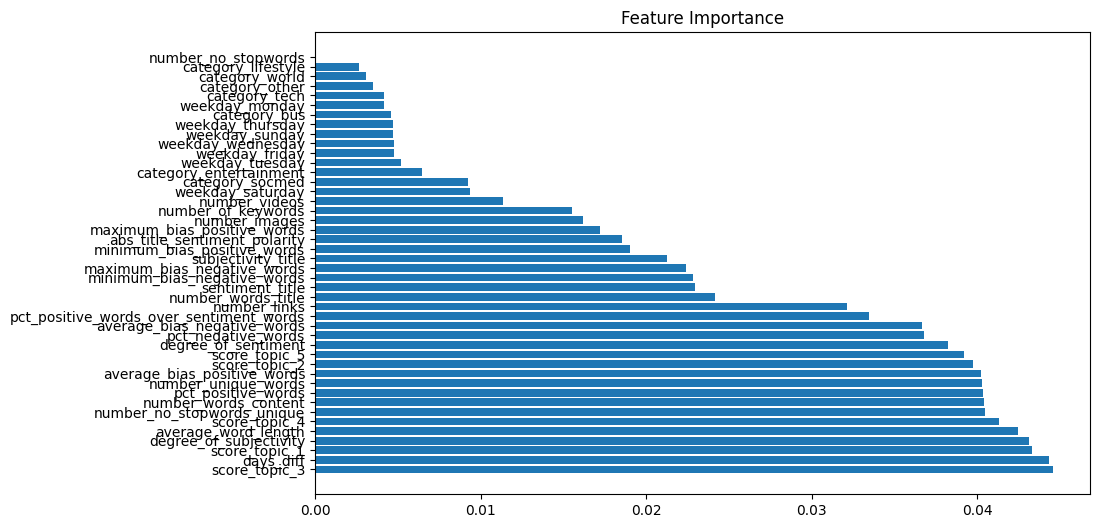

In [23]:
#feature importance

# create a dataframe with feature names and their importance

feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': best_model.feature_importances_})

# sort the dataframe by importance

feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# plot the dataframe

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.feature, feature_importance.importance)
plt.title('Feature Importance')
plt.show()

Index(['days_diff', 'score_topic_3', 'score_topic_2', 'score_topic_4',
       'score_topic_5', 'abs_title_sentiment_polarity',
       'degree_of_subjectivity', 'pct_positive_words_over_sentiment_words',
       'score_topic_1', 'weekday_saturday'],
      dtype='object')


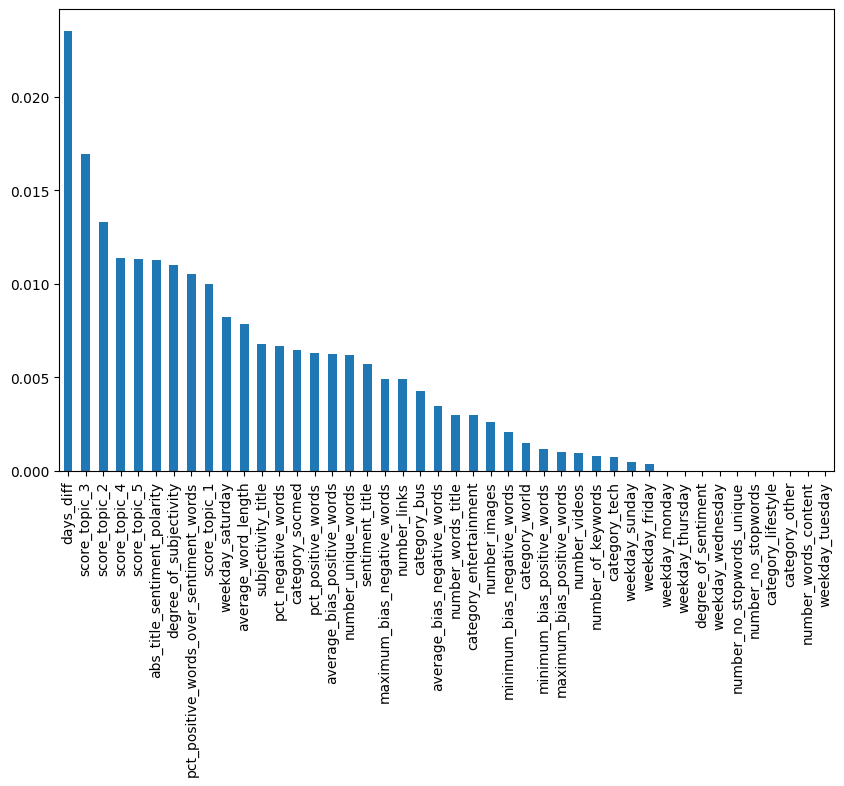

In [34]:
### Feature Selection

from sklearn.feature_selection import mutual_info_classif

# calculate mutual information

mi = mutual_info_classif(X, y)

#plot the mutual information from highest to lowest

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False, inplace=True)
mi.plot.bar(figsize=(10, 6))

# select the top 10 features

top_10_features = mi.sort_values(ascending=False).index[:10]
print(top_10_features)


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X_train[categorical_features]

chi2_features = SelectKBest(chi2, k=10)
X_kbest_features = chi2_features.fit_transform(X_cat, y_train)

# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])



ValueError: Input X must be non-negative.